# 1. Загрузка и подготовка данных

In [391]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [392]:
data = load_iris()

df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
df_iris['target'] = data.target
df_iris['target_names'] = data.target_names[data.target]

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [393]:
df_iris['target_names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

In [394]:
df_iris = df_iris.loc[df_iris['target_names'].isin(['virginica', 'versicolor'])]
df_iris['target_names'].value_counts()

versicolor    50
virginica     50
Name: target_names, dtype: int64

In [395]:
X = df_iris.iloc[:, :4]
y = df_iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Логистическая регрессия

In [447]:
epochs = 1000
l_rate = 0.01
eps = 1e-8

In [448]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [449]:
def pred(X, W, b):
  y_pred = sigmoid(X @ W + b)
  res = np.where(y_pred > 0.5, 2, 1)
  return res

In [450]:
def fit(X, y, iters, l_rate, eps):
  N_rows, N_columns = X.shape
  y = y - 1

  W = np.zeros(N_columns)
  b = 1
  cost = 0
  costs = []

  for _ in range(iters):
    y_pred = sigmoid(X @ W + b)

    diff = (y_pred - y)
    dw = (1 / N_rows) * (X.T @ diff)
    db = (1 / N_rows) * np.sum(diff)

    W = W - l_rate * dw
    b = b - l_rate * db

    loss = - (y.values * np.log(y_pred) + (1 - y.values) * np.log(1 - y_pred))
    cost_0 = cost
    cost = np.sum(loss) / N_columns
    costs.append(cost)

    iter = _
    if abs(cost_0 - cost) < eps: break

  return loss, costs, W, b, iter + 1

In [451]:
start = time.perf_counter()
loss_logr, cost_logr, W_logr, b_logr, iter_logr = fit(X_train, y_train, epochs, l_rate, eps)
time_logr = time.perf_counter() - start

pred_train_logr = pred(X_train, W_logr, b_logr)
pred_test_logr = pred(X_test, W_logr, b_logr)

print('y_train_pred:\n', pred_train_logr, '\ny_train:\n', y_train.values)
print('\ny_test_pred:\n', pred_test_logr, '\ny_test:\n', y_test.values)

y_train_pred:
 [2 2 1 1 2 1 2 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 2 2 2 1 2 2] 
y_train:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2]

y_test_pred:
 [2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1] 
y_test:
 [2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1]


Итерация 0: 15.765233750364455
Итерация 200: 12.773885192064245
Итерация 400: 11.380408585632525
Итерация 600: 10.25943034720632
Итерация 800: 9.34808236305315


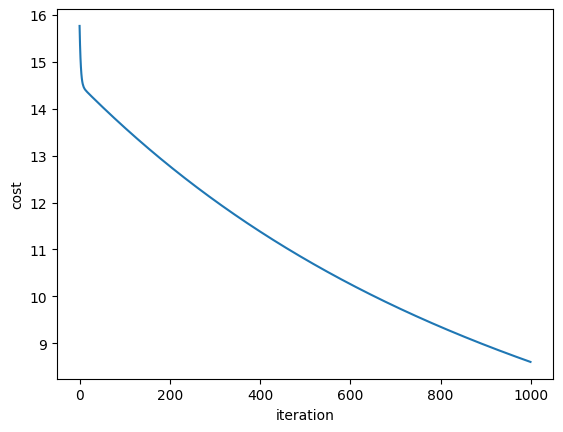

In [452]:
for i in range(0, len(cost_logr), int(len(cost_logr)/5)):
  print(f'Итерация {i}: {cost_logr[i]}')

plt.plot(cost_logr)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 3. Метод градиентного спуска

In [453]:
def grad(X, y, iters, l_rate, eps):
  N_rows, N_columns = X.shape
  X = np.c_[X, np.ones((N_rows, 1))]
  y = y - 1

  W = np.zeros(N_columns+1)
  dw = np.zeros(N_columns+1)
  costs = []
  loss = 0

  for _ in range(iters):
    for i in range(N_rows):
      diff = sigmoid(X[i] @ W) - y.values[i]
      dw += 2 * X[i] * diff

    W -= l_rate * dw/N_rows
    y_pred = sigmoid(X @ W)
    diff = y_pred - y

    loss_0 = loss
    loss = np.sum(diff) / N_columns
    costs.append(loss)

    iter = _
    if abs(loss_0 - loss) < eps: break

  return W, costs, iter + 1

In [454]:
start = time.perf_counter()
W_gr, cost_gr, iter_gr = grad(X_train, y_train, epochs, l_rate, eps)
time_gr = time.perf_counter() - start

pred_train_gr = pred(X_train, W_gr[:4], W_gr[-1])
pred_test_gr = pred(X_test, W_gr[:4], W_gr[-1])

print('y_train_pred:\n', pred_train_gr, '\ny_train:\n', y_train.values)
print('\ny_test_pred:\n', pred_test_gr, '\ny_test:\n', y_test.values)

y_train_pred:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2] 
y_train:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2]

y_test_pred:
 [2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1] 
y_test:
 [2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1]


Итерация 0: -0.0006680837001662443
Итерация 200: -0.1255872241101506
Итерация 400: 0.052836978371810214
Итерация 600: -0.026512371017809174
Итерация 800: -0.001565754535865102


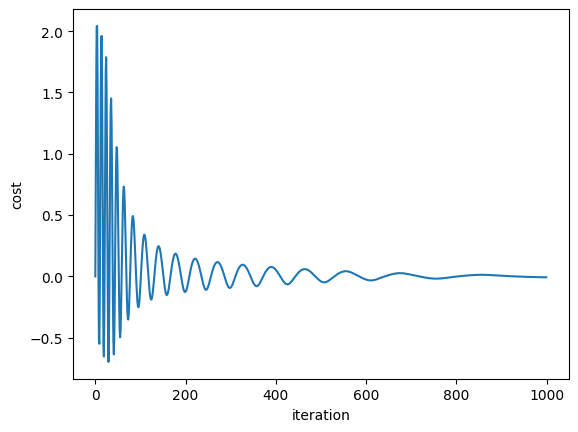

In [455]:
for i in range(0, len(cost_gr), int(len(cost_gr)/5)):
  print(f'Итерация {i}: {cost_gr[i]}')

plt.plot(cost_gr)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 4. Метод скользящего среднего

In [456]:
def RMSP(X, y, iters, l_rate, eps):
  N_rows, N_columns = X.shape
  y = y - 1
  X = np.c_[X, np.ones((N_rows, 1))]

  gamma = 0.9
  e = 1e-6

  W = np.zeros(N_columns + 1)
  rmsp = np.zeros(N_columns + 1)
  costs = []
  loss = 0

  for _ in range(iters):
    y_pred = sigmoid(X @ W)
    diff = (y_pred - y)
    gr = (X.T @ diff) / N_rows

    for i in range(len(gr)):
      rmsp[i] = gamma * rmsp[i] + (1 - gamma) * gr[i] ** 2
      W[i] -= l_rate * gr[i] / (np.sqrt(rmsp[i] + e))

    y_pred = sigmoid(X @ W)
    diff = (y_pred - y)

    loss_0 = loss
    loss = np.sum(diff) / N_columns
    costs.append(loss)

    iter = _
    if abs(loss_0 - loss) < eps: break

  return W, costs, iter + 1

In [457]:
start = time.perf_counter()
W_rmsp, cost_rmsp, iter_rmsp = RMSP(X_train, y_train, epochs, l_rate, eps)
time_rmsp = time.perf_counter() - start

pred_train_rmsp = pred(X_train, W_rmsp[:4], W_rmsp[-1])
pred_test_rmsp = pred(X_test, W_rmsp[:4], W_rmsp[-1])

print('y_train_pred:\n', pred_train_rmsp, '\ny_train:\n', y_train.values)
print('\ny_test_pred:\n', pred_test_rmsp, '\ny_test:\n', y_test.values)

y_train_pred:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2] 
y_train:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2]

y_test_pred:
 [2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1] 
y_test:
 [2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1]


Итерация 0: 2.102987281037402
Итерация 200: 0.4764529000723977
Итерация 400: 0.2739527376686487
Итерация 600: 0.17905654981025892
Итерация 800: 0.1283240181179961


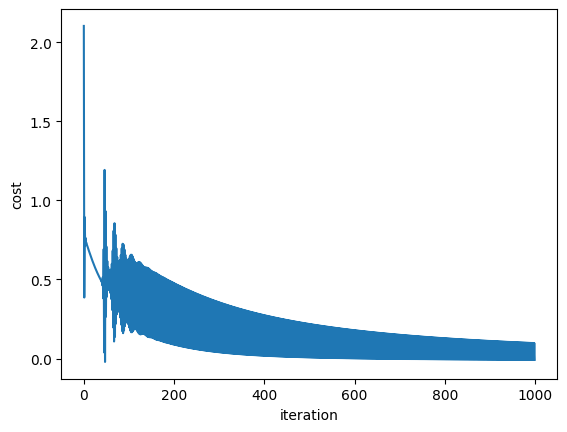

In [458]:
for i in range(0, len(cost_rmsp), int(len(cost_rmsp)/5)):
  print(f'Итерация {i}: {cost_rmsp[i]}')

plt.plot(cost_rmsp)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 5. Ускоренный по Нестерову метод адаптивной оценки моментов

In [459]:
def nadam(X, y, iters, l_rate, eps):
  N_rows, N_columns = X.shape
  y = y - 1
  X = np.c_[X, np.ones((N_rows, 1))]

  gamma = 0.9
  W = np.zeros(N_columns + 1)
  m = np.zeros(N_columns + 1)
  costs = []
  loss = 0

  for _ in range(iters):
    y_pred = sigmoid(X @ W)
    diff = (y_pred - y)
    gr = (X.T @ diff) / N_rows

    for i in range(len(W)):
      m[i] = gamma * m[i] + l_rate * gr[i]
      W[i] -= m[i]

    y_pred = sigmoid(X @ W)
    diff = (y_pred - y)

    loss_0 = loss
    loss = np.sum(diff) / N_columns
    costs.append(loss)

    iter = _
    if abs(loss_0 - loss) < eps: break

  return W, costs, iter + 1

In [460]:
start = time.perf_counter()
W_nadam, cost_nadam, iter_nadam = nadam(X_train, y_train, epochs, l_rate, eps)
time_nadam = time.perf_counter() - start

pred_train_nadam = pred(X_train, W_nadam[:4], W_nadam[-1])
pred_test_nadam = pred(X_test, W_nadam[:4], W_nadam[-1])

print('y_train_pred:\n', pred_train_nadam, '\ny_train:\n', y_train.values)
print('\ny_test_pred:\n', pred_test_nadam, '\ny_test:\n', y_test.values)

y_train_pred:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 2 2 2 1 2 2] 
y_train:
 [2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2
 1 2 2 1 2 2]

y_test_pred:
 [2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1] 
y_test:
 [2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1]


Итерация 0: -0.25016983590530095
Итерация 200: 0.37695519597468213
Итерация 400: 0.2618699408464318
Итерация 600: 0.21075695121347715
Итерация 800: 0.18105762385761473


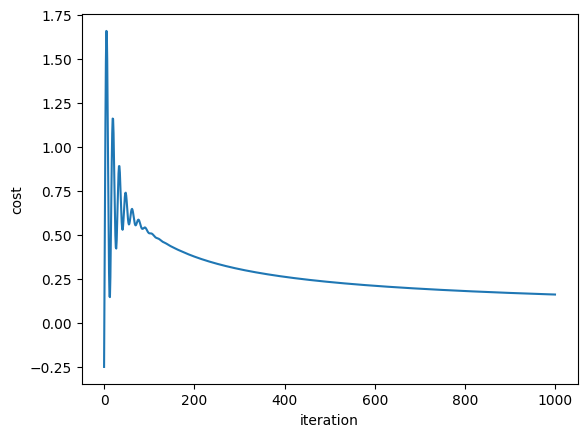

In [461]:
for i in range(0, len(cost_nadam), int(len(cost_nadam)/5)):
  print(f'Итерация {i}: {cost_nadam[i]}')

plt.plot(cost_nadam)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

# 6. Сравнение метрик

In [462]:
from sklearn.metrics import accuracy_score

score = {'method': ['Логистическая регрессия',
                    'Метод градиентного спуска',
                    'Метод скользящего среднего',
                    'Ускоренный по Нестерову метод адаптивной оценки моментов'],
         'accuracy_train': [accuracy_score(y_train, pred_train_logr),
                            accuracy_score(y_train, pred_train_gr),
                            accuracy_score(y_train, pred_train_rmsp),
                            accuracy_score(y_train, pred_train_nadam)],
         'accuracy_test': [accuracy_score(y_test, pred_test_logr),
                           accuracy_score(y_test, pred_test_gr),
                           accuracy_score(y_test, pred_test_rmsp),
                           accuracy_score(y_test, pred_test_nadam)],
         'iterations': [iter_logr, iter_gr, iter_rmsp, iter_nadam],
         'time, sec.': [time_logr, time_gr, time_rmsp, time_nadam]}

df_score = pd.DataFrame(score)

In [412]:
print(f'epochs: {epochs}\nepsilon: {eps}\nlearning rate: {l_rate}')
df_score.head()

epochs: 5000
epsilon: 1e-08
learning rate: 0.001


,method,accuracy_train,accuracy_test,iterations,"time, sec."
0,Логистическая регрессия,0.8750,0.70,5000,15.422124
1,Метод градиентного спуска,1.0000,0.85,5000,5.568768
2,Метод скользящего среднего,1.0000,0.85,5000,2.843595
3,Ускоренный по Нестерову метод адаптивной оценк...,0.9875,0.90,5000,4.025126


In [429]:
print(f'epochs: {epochs}\nepsilon: {eps}\nlearning rate: {l_rate}')
df_score.head()

epochs: 5000
epsilon: 1e-08
learning rate: 0.01


,method,accuracy_train,accuracy_test,iterations,"time, sec."
0,Логистическая регрессия,0.975,0.85,5000,12.295758
1,Метод градиентного спуска,1.000,0.85,2449,4.552523
2,Метод скользящего среднего,1.000,0.85,5000,4.048198
3,Ускоренный по Нестерову метод адаптивной оценк...,1.000,0.85,5000,2.426203


In [446]:
print(f'epochs: {epochs}\nepsilon: {eps}\nlearning rate: {l_rate}')
df_score.head()

epochs: 1000
epsilon: 1e-08
learning rate: 0.001


,method,accuracy_train,accuracy_test,iterations,"time, sec."
0,Логистическая регрессия,0.5250,0.40,1000,2.326691
1,Метод градиентного спуска,1.0000,0.90,1000,1.031311
2,Метод скользящего среднего,0.9875,0.85,1000,0.536080
3,Ускоренный по Нестерову метод адаптивной оценк...,0.9750,0.85,1000,0.471927


In [463]:
print(f'epochs: {epochs}\nepsilon: {eps}\nlearning rate: {l_rate}')
df_score.head()

epochs: 1000
epsilon: 1e-08
learning rate: 0.01


,method,accuracy_train,accuracy_test,iterations,"time, sec."
0,Логистическая регрессия,0.9500,0.85,1000,3.195421
1,Метод градиентного спуска,1.0000,0.85,1000,0.995577
2,Метод скользящего среднего,1.0000,0.85,1000,0.440532
3,Ускоренный по Нестерову метод адаптивной оценк...,0.9875,0.85,1000,0.527016


**Ускоренный по Нестерову метод адаптивной оценки моментов** показал наилучшие результаты при тестировании для *epochs* = 5000 и *learning rate* = 0.001.

При уменьшении *learning rate* до 0.01 время работы **ускоренного по Нестерову метода адаптивной оценки моментов** уменьшается примерно вдвое. При этом метрики для всех методов примерно одинаковые. Но у **метода градиентного спуска** меньше всего итераций.

В случае *epochs* = 1000 и *learning rate* = 0.001 метрика **логистической регрессии** для тестовых данных показывает результат, равный всего 0.4. А **метода градиентного спуска** показывает наилучшие результаты. Но время работы **метода скользящего среднего** и **ускоренного по Нестерову метода адаптивной оценки моментов** в 2 раза меньше.

При уменьшении *learning rate* до 0.01 все методы показывают примерно одинаковые метрики и количество итераций. Наименьшее время работы у **метода скользящего среднего**.

Т.е., для показателей *epochs* = 1000 и *learning rate* = 0.01 выбранный метод влияет только на время обучения.
